In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [108]:
# import file using pandas

city_file = os.path.join('raw_data', 'city_data.csv')
ride_file = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')

In [110]:
# var to hold avg fare by city
avg_fare = merged_df.groupby("city")["fare"].mean()

#var to hold rides by city
ride_count = merged_df.groupby("city")["ride_id"].count()

# num of drivers
driver_count = merged_df.groupby("city")["ride_id"].count()

# city type data
city_type = city_df.set_index('city')['type']


In [111]:
# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


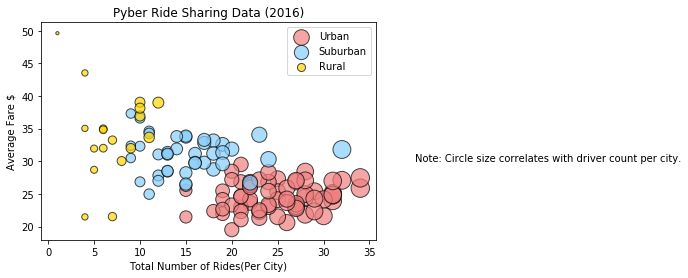

In [116]:
#Separate dfs for each categories
rural = city_info.loc[city_info['Type of City'] == 'Rural']
suburban = city_info.loc[city_info['Type of City'] == 'Suburban']
urban = city_info.loc[city_info['Type of City'] == 'Urban']


#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare"], marker ="o", facecolors = "lightcoral", edgecolors="black", sizes = urban["Number of Drivers"]*10, label = "Urban", alpha = 0.7, linewidth = 1)


#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], marker ="o", facecolors = "lightskyblue", edgecolors ="black", sizes = suburban["Number of Drivers"]*10, label = "Suburban", alpha = 0.7, linewidth = 1)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare"], marker ="o", facecolors = "gold", edgecolors = "black", sizes = rural["Number of Drivers"]*10, label = "Rural", alpha = 0.7, linewidth = 1)

# Add title, x axis label and y axis label
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare $")
plt.text(40, 30,"Note: Circle size correlates with driver count per city.")

#Add the legend
plt.legend(loc= "upper right")

#Show plot
plt.show()

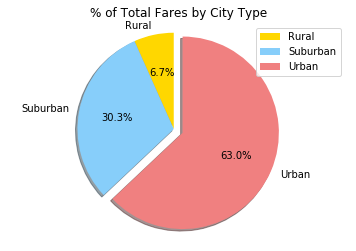

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

In [117]:
#group by type to be used for all pie charts

city_fare_pie = merged_df.groupby(["type"])["fare"].sum()
city_fare_pie

#Use the City Pie index for wedge labels.
city_fare_pie.index

colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, explode = explode,labels = city_fare_pie.index, autopct = '{:.1f}%'.format, colors = colors,  shadow = True, startangle = 90)



#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#To Add legend and title
plt.legend(loc = "upper right")
plt.title('% of Total Fares by City Type')

#Display chart
plt.show()


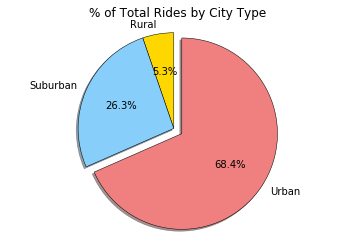

In [114]:
# number of ride per city type

city_rides_pie = merged_df.groupby(["type"])["ride_id"].count()
city_rides_pie.index

# labels = city_ride_pie_index
plt.pie(city_rides_pie,  explode = explode, labels = city_rides_pie.index, autopct = '{:.1f}%'.format, colors = colors, shadow = True, startangle = 90 ,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

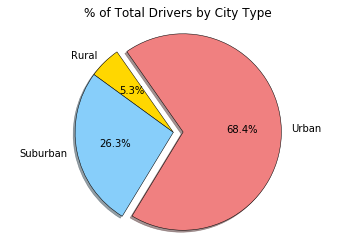

In [118]:
# of driver per city type

driver_sum = merged_df.groupby('type').count()['driver_count']

# labels = city_ride_pie_index
labels = driver_sum.index

plt.pie(driver_sum,  explode = explode, labels = driver_sum.index, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 125,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()